In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dataset = pd.read_csv("../data/gesture7.txt")

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,gesture
0,0.41,0.48,0.01,0.22,1.00,0.28,0.12,0.30,0.07,0.14,0.00,0.06,0.22,0.09,0.32,0.08,3
1,0.13,0.18,0.08,0.13,0.52,0.32,0.52,0.26,0.12,0.02,0.07,0.00,1.00,0.34,0.39,0.21,3
2,0.02,0.04,0.00,0.59,0.31,0.07,0.48,0.56,0.10,1.00,0.20,0.04,0.85,0.01,0.61,0.47,3
3,0.22,0.53,0.00,0.53,0.46,0.02,0.87,0.01,0.28,0.50,0.20,0.24,1.00,0.05,0.20,0.18,3
4,0.46,0.58,0.28,0.08,0.48,0.31,1.00,0.89,0.01,0.13,0.06,0.04,0.80,0.70,0.58,0.86,3


In [4]:
dataset = dataset.dropna()
dataset_train = np.array(dataset)
X_train = dataset_train[:,:-1]

In [5]:
distance_matrix = np.zeros((7,7))

In [6]:
distance_matrix

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [7]:
a = dataset[dataset['gesture'] == 3]

In [8]:
a.shape[0]

571

In [9]:
distances = []
for i in range(7):
    distance = []
    a = dataset[dataset['gesture'] == i]
    l = a.shape[0]
    for j in range(16):
        distance.append(a[str(j)].sum()/l)  
    distances.append(distance)

In [10]:
df = pd.DataFrame(distances)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.631381,0.421063,0.146397,0.173397,0.071460,0.103444,0.251444,0.551063,0.592048,0.423254,0.143619,0.185841,0.068889,0.102286,0.254095,0.542190
1,0.086606,0.041939,0.089899,0.494768,0.509737,0.574101,0.164303,0.205293,0.079394,0.038283,0.081515,0.467495,0.497556,0.567758,0.168242,0.205434
2,0.539390,0.254989,0.117821,0.155795,0.482876,0.329434,0.180501,0.591155,0.559630,0.248148,0.109499,0.158671,0.461721,0.336427,0.198627,0.629390
3,0.246918,0.290140,0.234536,0.200123,0.568371,0.244851,0.492574,0.441979,0.239562,0.282715,0.223450,0.196410,0.569807,0.249982,0.499002,0.467023
4,0.626923,0.327154,0.128365,0.064827,0.063481,0.326654,0.174942,0.481808,0.647077,0.307731,0.131846,0.068250,0.071308,0.307269,0.175596,0.491250
5,0.472147,0.273174,0.110771,0.106826,0.398917,0.502018,0.195780,0.418330,0.464422,0.264716,0.101321,0.104385,0.425780,0.507817,0.179211,0.385615
6,0.327667,0.161744,0.075132,0.070588,0.471055,0.349128,0.392941,0.538742,0.319675,0.155862,0.074138,0.074949,0.501927,0.346024,0.390994,0.522576


In [12]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(df.values, metric='euclidean')
dist_matrix = squareform(distances)

In [13]:
for i in range(7):
    for j in range(7):
        dist_matrix[i][j] = ('{:.3f}'.format(dist_matrix[i][j]))

In [14]:
dist_matrix[2][2]

0.0

In [18]:
pd.DataFrame(dist_matrix)

,0,1,2,3,4,5,6
0,0.000,1.450,0.719,1.000,0.403,0.844,0.919
1,1.450,0.000,1.087,0.966,1.336,0.889,0.945
2,0.719,1.087,0.000,0.700,0.634,0.421,0.485
3,1.000,0.966,0.700,0.000,1.043,0.727,0.439
4,0.403,1.336,0.634,1.043,0.000,0.625,0.840
5,0.844,0.889,0.421,0.727,0.625,0.000,0.498
6,0.919,0.945,0.485,0.439,0.840,0.498,0.000


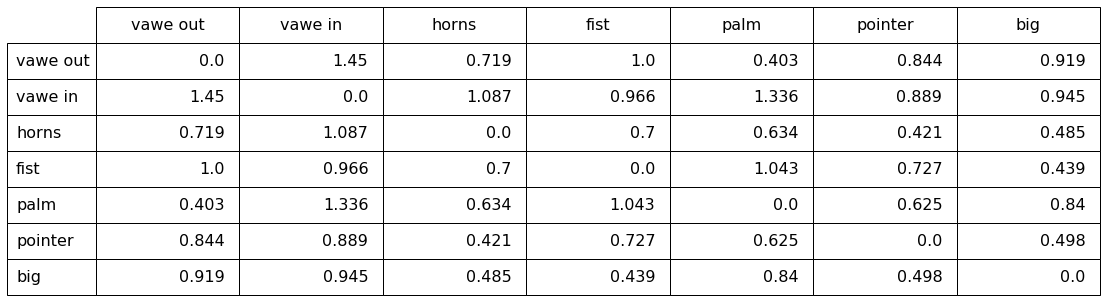

In [19]:
labels = ["vawe out","vawe in","horns","fist","palm","pointer","big"]
ytable = plt.table(cellText=dist_matrix, rowLabels=labels, colLabels=labels, loc="center right")
ytable.set_fontsize(16)
ytable.scale(3, 3)
plt.axis("off")
plt.grid(False)
plt.show()

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [21]:
finalDf = pd.concat([principalDf, dataset[['gesture']]], axis = 1)

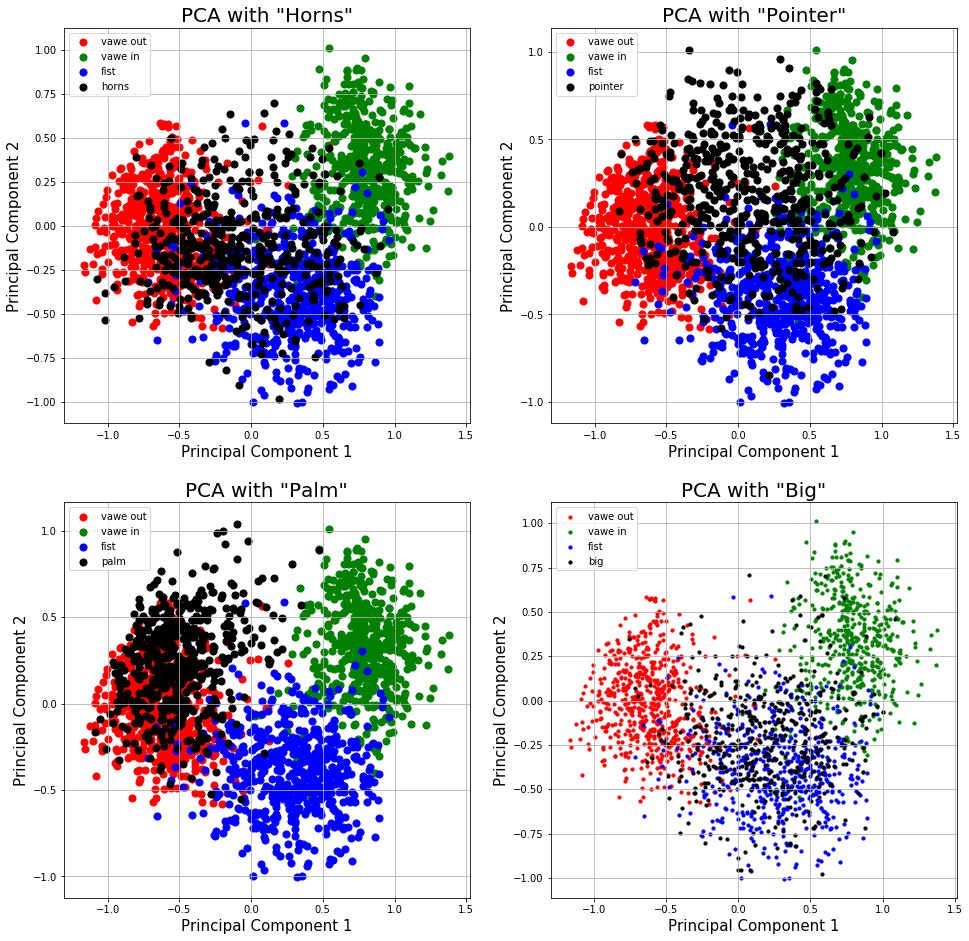

In [29]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(221) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with "Horns"', fontsize = 20)
targets = [0,1,3,2]
colors = ['r', 'g', 'b','k', 'm', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gesture'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend([labels[target] for target in targets])
ax.grid()

ax = fig.add_subplot(222) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with "Pointer"', fontsize = 20)
targets = [0,1,3,5]
colors = ['r', 'g', 'b','k', 'm', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gesture'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend([labels[target] for target in targets])
ax.grid()

ax = fig.add_subplot(223) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with "Palm"', fontsize = 20)
targets = [0,1,3,4]
colors = ['r', 'g', 'b','k', 'm', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gesture'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend([labels[target] for target in targets])
ax.grid()

ax = fig.add_subplot(224) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with "Big"', fontsize = 20)
targets = [0,1,3,6]
colors = ['r', 'g', 'b','k', 'm', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gesture'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend([labels[target] for target in targets])
ax.grid()

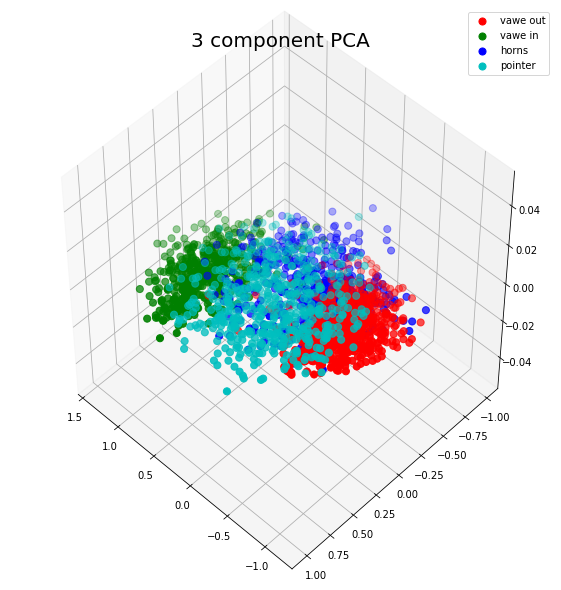

In [66]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, dataset[['gesture']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0,1,2,5]
colors = ['r', 'g', 'b','c', 'm', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gesture'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend([labels[target] for target in targets])
ax.grid()